# Linear Regression

## Using the Boston Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



```python
from sklearn.datasets import load_boston
dataset = load_boston()
```
> Returns
```python
ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.
```
This piece of code is not longer needed. 

```python
print(dataset.feature_names)
print(dataset.DESCR)
print(dataset.target)
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
df.head()
```


In [2]:
df = pd.read_csv('data/HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Data Cleansing

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
print(df.isnull().sum())


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


## Feature Selection

In [6]:
corr = df.corr()
print(corr)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342   
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       -0.381411  0.171303 

In [7]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])


Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73582201 0.69535995]


## Multiple Regression

Text(0, 0.5, 'MEDV')

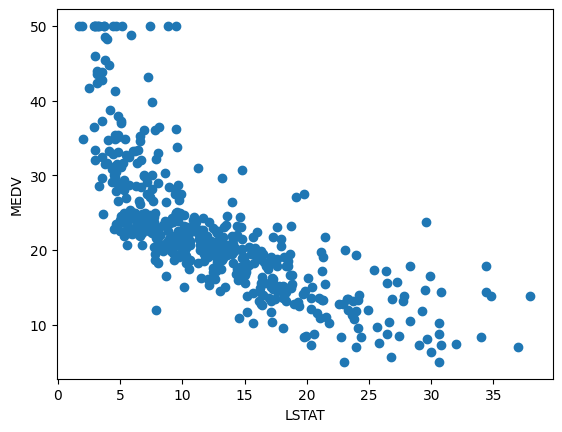

In [8]:
%matplotlib inline

plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')


Text(0, 0.5, 'MEDV')

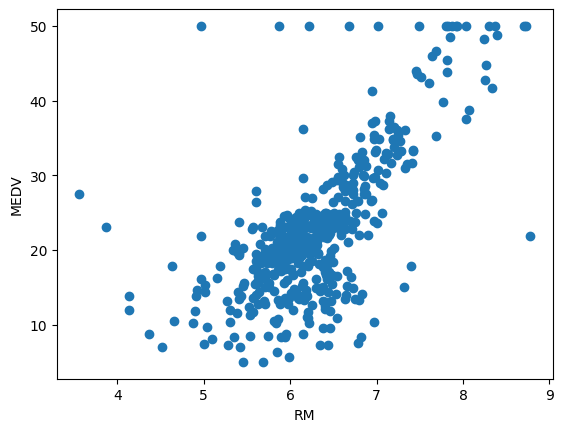

In [9]:
plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')


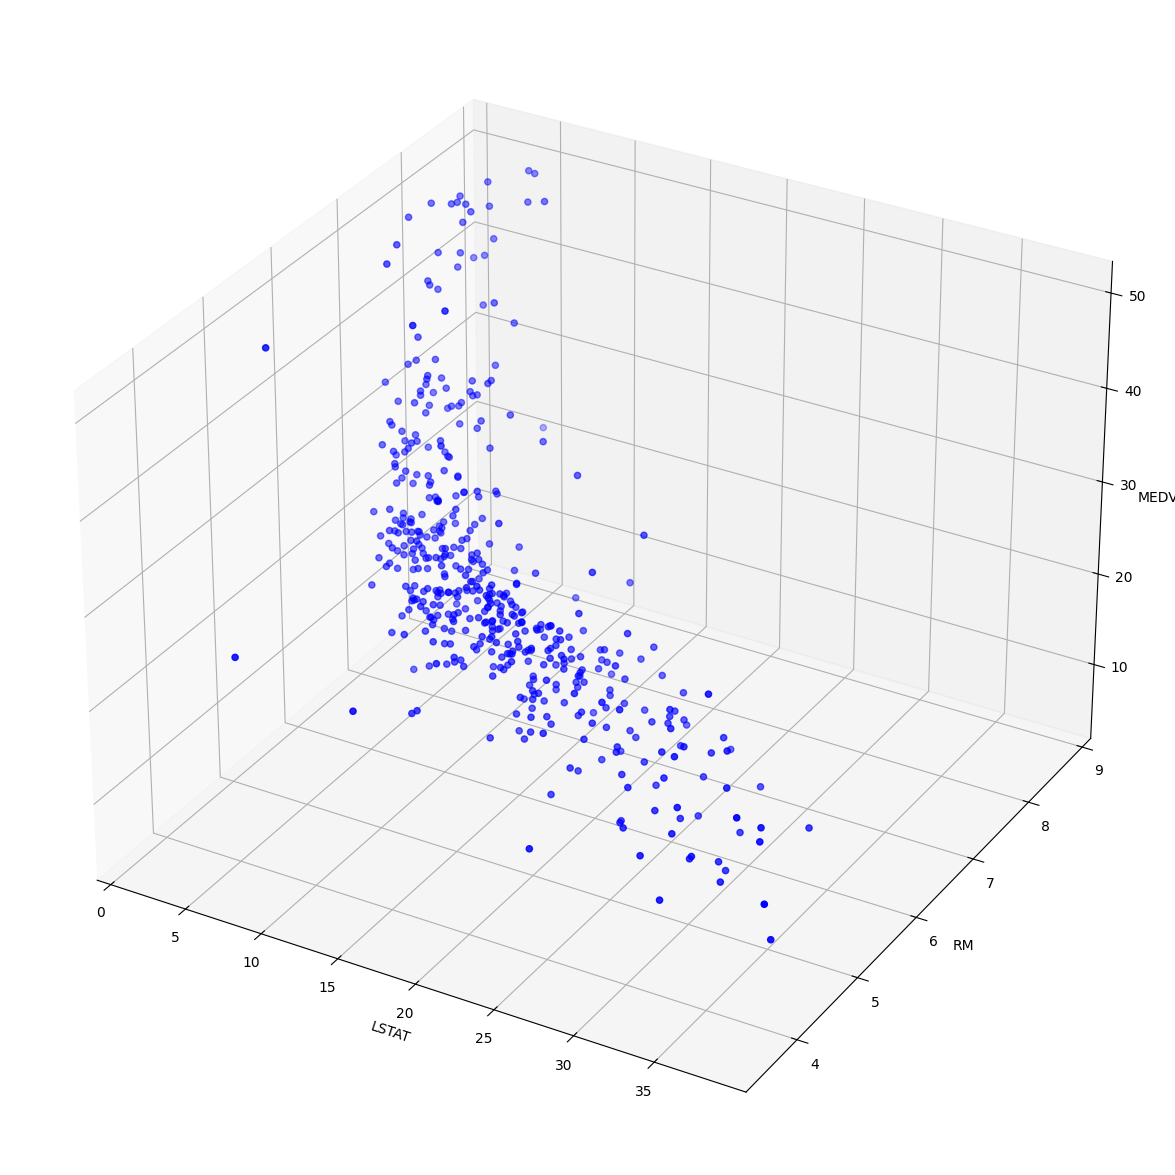

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['LSTAT'],
           df['RM'],
           df['MEDV'],
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()


## Training the Model

In [11]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)


In [13]:
print(x_train.shape)
print(Y_train.shape)


(354, 2)
(354,)


In [14]:
print(x_test.shape)
print(Y_test.shape)


(152, 2)
(152,)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
price_pred = model.predict(x_test)


In [ ]:
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")


## Getting the Intercept and Coefficients

In [ ]:
print(model.intercept_)
print(model.coef_)


In [ ]:
print(model.predict([[30,5]]))


## Plotting the 3D Hyperplane

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_boston
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)   #---for LSTAT---
y_surf = np.arange(0, 10, 1)   #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()


# Exercises
---

1. Try the above in a python file. 

# Polynomial Regression

In [ ]:
df = pd.read_csv('polynomial.csv')
plt.scatter(df.x,df.y)


In [ ]:
model = LinearRegression()

x = df.x[0:6, np.newaxis]     #---convert to 2D array---
y = df.y[0:6, np.newaxis]     #---convert to 2D array---

model.fit(x,y)

#---perform prediction---
y_pred = model.predict(x)

#---plot the training points---
plt.scatter(x, y, s=10, color='b')

#---plot the straight line---
plt.plot(x, y_pred, color='r')
plt.show()

#---calculate R-squared---
print('R-squared for training set: %.4f' % model.score(x,y))


## Formula for Polynomial Regression

A polynomial function of degree 1 has the following form:

Y = β0 + β1x

Quadratic regression is a degree 2 

Y = β0 + β1x + β2x2

For a polynomial of degree 3, the formula is as follows:

Y = β0 + β1x + β2x2 + β3x3

In general, a polynomial of degree n has the formula of:

Y = β0 + β1x + β2x2 + β3x3 + … + βnxn

The idea behind polynomial regression is simple — find the coefficients of the polynomial function that best fits the data.


## Polynomial Regression in Scikit-learn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2

polynomial_features = PolynomialFeatures(degree = degree)


In [ ]:
x_poly = polynomial_features.fit_transform(x)
print(x_poly)


In [ ]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#---plot the points---
plt.scatter(x, y, s=10)

#---plot the regression line---
plt.plot(x, y_poly_pred)
plt.show()


In [ ]:
print(model.intercept_)
print(model.coef_)


In [ ]:
print('R-squared for training set: %.4f' % model.score(x_poly,y))


## Using Polynomial Multiple Regression on the Boston Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)


In [ ]:
#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)


When using a polynomial function of degree 2 on two independent variables x1 and x2, the formula becomes:

Y = β0 + β1x1 + β2x2 + β3x12 + β4x1x2 +β5x22

where Y is the dependent variable, β0 is the intercept, β1, β2, β3, and β4 are the coefficients of the various combinations of the two features x1 and x2, respectively.


In [ ]:
#---print out the formula---
print(polynomial_features.get_feature_names(['x','y']))


In [ ]:
model = LinearRegression()
model.fit(x_train_poly, Y_train)


In [ ]:
x_test_poly = polynomial_features.fit_transform(x_test)
print('R-squared: %.4f' % model.score(x_test_poly,
                                      Y_test))


In [ ]:
print(model.intercept_)
print(model.coef_)


With these values, the formula now becomes:

Y = β0 + β1x1 + β2x2 + β3x12 + β4x1x2 +β5x22

Y = 26.9334305238 + 1.47424550e+00 x1 + (-6.70204730e+00) x2 + 7.93570743e-04 x12 + (-3.66578385e-01) x1x2 + 1.17188007e+00 x22


## Plotting the 3D Hyperplane

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)   #---for LSTAT---
y_surf = np.arange(0, 10, 1)   #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_poly = polynomial_features.fit_transform(x)
print(polynomial_features.get_feature_names(['x','y']))

#---apply linear regression---
model = LinearRegression()
model.fit(x_poly, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ +
                (model.coef_[1] * x) +
                (model.coef_[2] * y) +
                (model.coef_[3] * x**2) +
                (model.coef_[4] * x*y) +
                (model.coef_[5] * y**2))

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()


# Exercises
---

1. Try the above in a python file.